In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random

## 4a

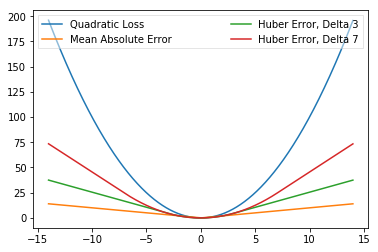

In [213]:
delta = 3
huber = lambda e, delta: ((e**2)/2) if np.abs(e) <= delta else ((delta * np.abs(e)) - ((delta**2)/2))


ax = plt.subplot(111)
t1 = np.arange(-14.0, 14.0, 0.01)


t2 = [huber(x, delta) for x in t1]

plt.plot(t1, t1**2, label="Quadratic Loss")
plt.plot(t1, np.abs(t1), label="Mean Absolute Error")
plt.plot(t1, [huber(x, 3) for x in t1], label="Huber Error, Delta 3")
plt.plot(t1, [huber(x, 7) for x in t1], label="Huber Error, Delta 7")

leg = plt.legend(loc='best', ncol=2, mode="expand", shadow=False, fancybox=False)
leg.get_frame().set_alpha(0.5)


plt.show()
# plot second time

### Relative advantages and disadvantages of loss functions for linear regression.

Given the plots and thier mathematical equations, it appears that Mean Absolute Error is less senstive to outliers than Quadratic Loss. A square of a single large outlier might be enough to alter our weights in a significant way. Therefore in noisy datasets with alrge outliers, it appears that MAE is a better choice. However, since mean absolute error doesn't reduce the slope as it approaches optima, it might be more sentive to large learning rates and might never reach an optima.

Huber Loss on the other hand is a good tradeoff between the above two loss functions. It is linear at large loss values allowing it to be robust to outliers, while employing a nice curvature with a reducing slope as it approaches optima. The catch with huber loss, however, is that we may not neccesarily know the delta beforehand.

## 4b

In [2]:
def genData(numPoints, slope, intercept):
    x = np.zeros(shape=(numPoints, 2))
    y = np.zeros(shape=numPoints)
    
    x[:,0] = 1
    x[:,1] = np.random.uniform(-2, 2, size = numPoints)
    
    for i in range(0, numPoints): y[i] = (x[i][1] * slope) + (intercept + np.random.normal(0,4))
    
    return x, y



In [207]:
def gradientDescent(x, y, theta, alpha, m, numIterations, loss_type):
    
    xTrans = x.transpose()
    for i in range(0, numIterations):
        
        hypothesis = np.dot(x, theta)

        if loss_type == 'quadratic':
            
            loss = hypothesis - y
            cost = np.sum(loss ** 2) / (2 * m)
        
        elif loss_type == 'mean_absolute':
            
            loss = hypothesis - y

            loss[loss>0] = 1
            loss[loss<0] = -1
            
            cost = np.sum(loss) / (2 * m)
            
        elif loss_type == 'huber':
            
            delta = 2
            huber = lambda e, delta: ((e/2)**2) if np.abs(e) <= delta else ((delta * np.abs(e)) - ((delta**2)/2))
            loss = hypothesis - y
            loss[abs(loss) <= delta] = loss[abs(loss) <= delta]
            loss[abs(loss) > delta] = delta * np.sign(loss[abs(loss) > delta])
            cost = huber(np.sum(loss), delta) / (2 * m)
        
        #print("\n\n\nIteration %d | Cost: %f" % (i, cost))
        
        gradient = np.dot(xTrans, loss) / m #Partial derivative        
        theta = theta - alpha * gradient
        
        #print ('gradient' + str(gradient))
        #print ('theta' + str(theta))
    
    return theta

## 5A

In [221]:
#Referenced Stackoverflow for this

from numpy import array, dot, transpose
from numpy.linalg import inv

def analytical_linear_regression(x_train, y_train):
    
    X = np.array(x_train)
    y = np.array(y_train)
    
    Xt = transpose(X)
    product = dot(Xt, X)
    theInverse = inv(product)
    w = dot(dot(theInverse, Xt), y)
    
    return w

In [222]:
analytical_linear_regression(x,y)

array([3.23055664, 4.20992994])

In [203]:
def gradientDescentSto(x, y, theta, alpha, m, numIterations, loss_type, delta=2, conv=0.00000001):


    xTrans = x.transpose()
    count = 0
    theta_prev = theta + delta + 1
    
    while (count < numIterations):
            
            count += 1

            for i in range(m):

                hypothesis = x[i][0] * theta[0] + x[i][1]*theta[1]

                if loss_type == 'quadratic': loss = hypothesis - y[i]

                if loss_type == 'mean_absolute': 
                    
                    loss = hypothesis - y[i]
                    loss = 1 if loss >= 0 else -1 

                if loss_type == 'huber': 

                    loss = hypothesis - y[i]
                    if loss < -delta: loss = -delta
                    elif -delta <= loss and loss <= delta: loss = loss 
                    elif delta < loss: loss = delta

                gradient1 = x[i][0] * loss
                gradient0 = x[i][1] * loss

                theta_prev = theta
                theta[1] = theta[1] - alpha * gradient0
                theta[0] = theta[0] - alpha * gradient1
                                
        
    return theta

## Calling and Plotting

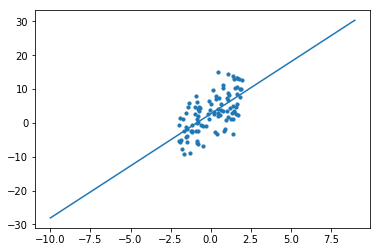

In [206]:
x, y = genData(100, 3, 2)
m, n = np.shape(x) 

theta = gradientDescentSto(x, y, np.ones(n), alpha = 0.0001, m, numIterations = 5000, 'huber', 7)
hypothesis = lambda x: x * theta[1] + theta[0]
plt.plot([i for i in range(-10,10)],[hypothesis(i) for i in range(-10,10)])
plt.scatter([i[1] for i in x], y, s=10)
plt.show()


## Call 1000 times and histogram for Huber, MAE and Analytical

In [492]:
thetas_huber = []
thetas_mean_abs = []
thetas_analytical = []

for i in range(100):
    #print (i)
    x, y = genData(100, 3, 2)
    m, n = np.shape(x)
    numIterations= 5000
    
    alpha = 0.0001
    thetas_huber.append(gradientDescentSto(x, y, np.ones(n), alpha, m, numIterations, 'huber', 7))
    thetas_mean_abs.append(gradientDescentSto(x, y, np.ones(n), alpha, m, numIterations, 'mean_absolute'))
    thetas_analytical.append(analytical_linear_regression(x,y))

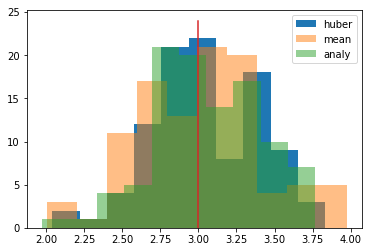

In [411]:
plt.hist(np.array(thetas_huber)[:,1], label = 'huber')
plt.hist(np.array(thetas_mean_abs)[:,1], label = 'mean', alpha = 0.5)
plt.hist(np.array(thetas_analytical)[:,1], label = 'analy', alpha = 0.5)

plt.plot([3 for i in range (25)], [i for i in range(25)])
#plt.plot(x,3,linestyle='solid')

plt.legend()
plt.show()

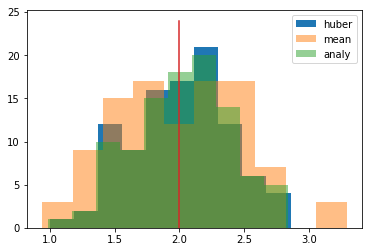

In [412]:
plt.hist(np.array(thetas_huber)[:,0], label = 'huber')
plt.hist(np.array(thetas_mean_abs)[:,0], label = 'mean', alpha = 0.5)
plt.hist(np.array(thetas_analytical)[:,0], label = 'analy', alpha = 0.5)


plt.plot([2 for i in range (25)], [i for i in range(25)])


plt.legend()
plt.show()

## Choice of Loss Function Affecting Slope and Intercept

As explained in 4a, Hubers loss function appears to have the highest frequecy of slope closest to 3 and itercept with analytical coming in a close second. However, since analytical solution is the actual solution to our simulated values, that should be used as benchmark. As such, Huber outperforms MAE in estimating the slope and intercept. 

## Call 1000 times and histogram for Batch, Stochastic and Analytical

In [228]:
thetas_sto_quadratic = []
thetas_batch_quadratic = []
thetas_analytical = []

for i in range(100):
    #print (i)
    x, y = genData(100, 3, 2)
    m, n = np.shape(x)
    numIterations= 5000
    alpha = 0.001
    
    thetas_sto_quadratic.append(gradientDescentSto(x, y, np.ones(n), alpha, m, numIterations, 'quadratic'))
    thetas_batch_quadratic.append(gradientDescent(x, y, np.ones(n), alpha, m, numIterations, 'quadratic'))
    thetas_analytical.append(analytical_linear_regression(x,y))

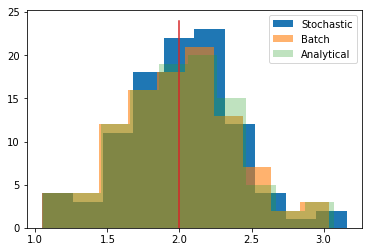

In [233]:
plt.hist(np.array(thetas_quadratic)[:,0], label = 'Stochastic', alpha = 1)
plt.hist(np.array(thetas_batch_quadratic)[:,0], label = 'Batch', alpha = 0.6)
plt.hist(np.array(thetas_analytical)[:,0], label = 'Analytical', alpha = 0.3)



plt.plot([2 for i in range (25)], [i for i in range(25)])


plt.legend()
plt.show()

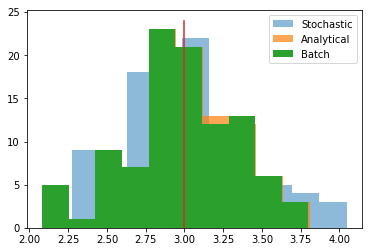

In [242]:
plt.hist(np.array(thetas_quadratic)[:,1], label = 'Stochastic', alpha = 0.5)
plt.hist(np.array(thetas_analytical)[:,1], label = 'Analytical', alpha = 0.7)
plt.hist(np.array(thetas_batch_quadratic)[:,1], label = 'Batch', alpha = 1)



plt.plot([3 for i in range (25)], [i for i in range(25)])


plt.legend()
plt.show()

## Choice of Algorithm Affecting Slope and Intercept

Using the analytical solution as the benchmark, it appears like batch almost exactly mimics the analytical solutions to the simulated data, outperforming stochastic in this case.

## Add Anomalies

In [486]:
outlier_indices = [int(i) for i in np.random.uniform(0,100, size = 10)]
outlier_indices_indices = [int(i) for i in np.random.uniform(0,10, size = 5)]
x[outlier_indices]


array([[ 1.        ,  1.40664088],
       [ 1.        ,  1.81175379],
       [ 1.        , -0.26609268],
       [ 1.        ,  0.57753574],
       [ 1.        ,  0.41188323],
       [ 1.        ,  0.03637198],
       [ 1.        ,  1.19956399],
       [ 1.        , -0.83287292],
       [ 1.        ,  0.7396422 ],
       [ 1.        , -0.43608485]])

In [488]:
positive_indices = [outlier_indices[i] for i in outlier_indices_indices]
negative_indices = [outlier_indices[i] for i in [outlier_indices.index(i) for i in outlier_indices if outlier_indices.index(i) not in outlier_indices_indices]]

In [489]:
for i in positive_indices: x[i] += 0.5*x[i]
for i in negative_indices: x[i] -= 0.5*x[i]

## Rerun 1000 times with anomalies

In [243]:
thetas_quadratic = []
thetas_quadratic.append(gradientDescentSto(x, y, np.ones(n), alpha, m, numIterations, 'quadratic'))



In [245]:
thetas_huber = []
thetas_mean_abs = []
thetas_quadratic = []
thetas_analytical = []

for i in range(100):
    #print (i)
    x, y = genData(100, 3, 2)
    m, n = np.shape(x)
    numIterations= 5000
    alpha = 0.0001
    
    thetas_huber.append(gradientDescentSto(x, y, np.ones(n), alpha, m, numIterations, 'huber', 7))
    thetas_mean_abs.append(gradientDescentSto(x, y, np.ones(n), alpha, m, numIterations, 'mean_absolute'))
    thetas_quadratic.append(gradientDescentSto(x, y, np.ones(n), alpha, m, numIterations, 'quadratic'))
    thetas_analytical.append(analytical_linear_regression(x,y))

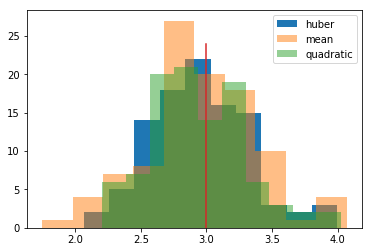

In [251]:
plt.hist(np.array(thetas_huber)[:,1], label = 'huber')
plt.hist(np.array(thetas_mean_abs)[:,1], label = 'mean', alpha = 0.5)
plt.hist(np.array(thetas_quadratic)[:,1], label = 'quadratic', alpha = 0.5)


plt.plot([3 for i in range (25)], [i for i in range(25)])


#plt.plot(x,3,linestyle='solid')
plt.legend()
plt.show()

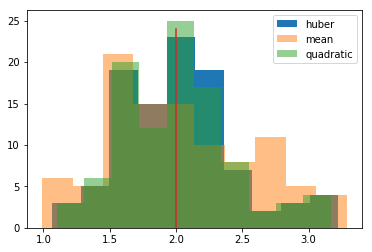

In [250]:
plt.hist(np.array(thetas_huber)[:,0], label = 'huber')
plt.hist(np.array(thetas_mean_abs)[:,0], label = 'mean', alpha = 0.5)
plt.hist(np.array(thetas_quadratic)[:,0], label = 'quadratic', alpha = 0.5)


plt.plot([2 for i in range (25)], [i for i in range(25)])


plt.legend()
plt.show()

## Choice of Loss in Noisy Data Affecting Slope and Intercept

Using the analytical solution as the benchmark, huber and quadratic outperform MAE in this case. This could be since the anomalies built into the data are balanced by design and therefore don't skew the squared error in any particular direction.
